In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('Alphabets_data.csv')
data

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,D,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,C,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,T,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,S,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   letter  20000 non-null  object
 1   xbox    20000 non-null  int64 
 2   ybox    20000 non-null  int64 
 3   width   20000 non-null  int64 
 4   height  20000 non-null  int64 
 5   onpix   20000 non-null  int64 
 6   xbar    20000 non-null  int64 
 7   ybar    20000 non-null  int64 
 8   x2bar   20000 non-null  int64 
 9   y2bar   20000 non-null  int64 
 10  xybar   20000 non-null  int64 
 11  x2ybar  20000 non-null  int64 
 12  xy2bar  20000 non-null  int64 
 13  xedge   20000 non-null  int64 
 14  xedgey  20000 non-null  int64 
 15  yedge   20000 non-null  int64 
 16  yedgex  20000 non-null  int64 
dtypes: int64(16), object(1)
memory usage: 2.6+ MB


In [4]:
data.isna().sum()

,0
letter,0
xbox,0
ybox,0
width,0
height,0
onpix,0
xbar,0
ybar,0
x2bar,0
y2bar,0


array([[<Axes: title={'center': 'xbox'}>,
        <Axes: title={'center': 'ybox'}>,
        <Axes: title={'center': 'width'}>,
        <Axes: title={'center': 'height'}>],
       [<Axes: title={'center': 'onpix'}>,
        <Axes: title={'center': 'xbar'}>,
        <Axes: title={'center': 'ybar'}>,
        <Axes: title={'center': 'x2bar'}>],
       [<Axes: title={'center': 'y2bar'}>,
        <Axes: title={'center': 'xybar'}>,
        <Axes: title={'center': 'x2ybar'}>,
        <Axes: title={'center': 'xy2bar'}>],
       [<Axes: title={'center': 'xedge'}>,
        <Axes: title={'center': 'xedgey'}>,
        <Axes: title={'center': 'yedge'}>,
        <Axes: title={'center': 'yedgex'}>]], dtype=object)

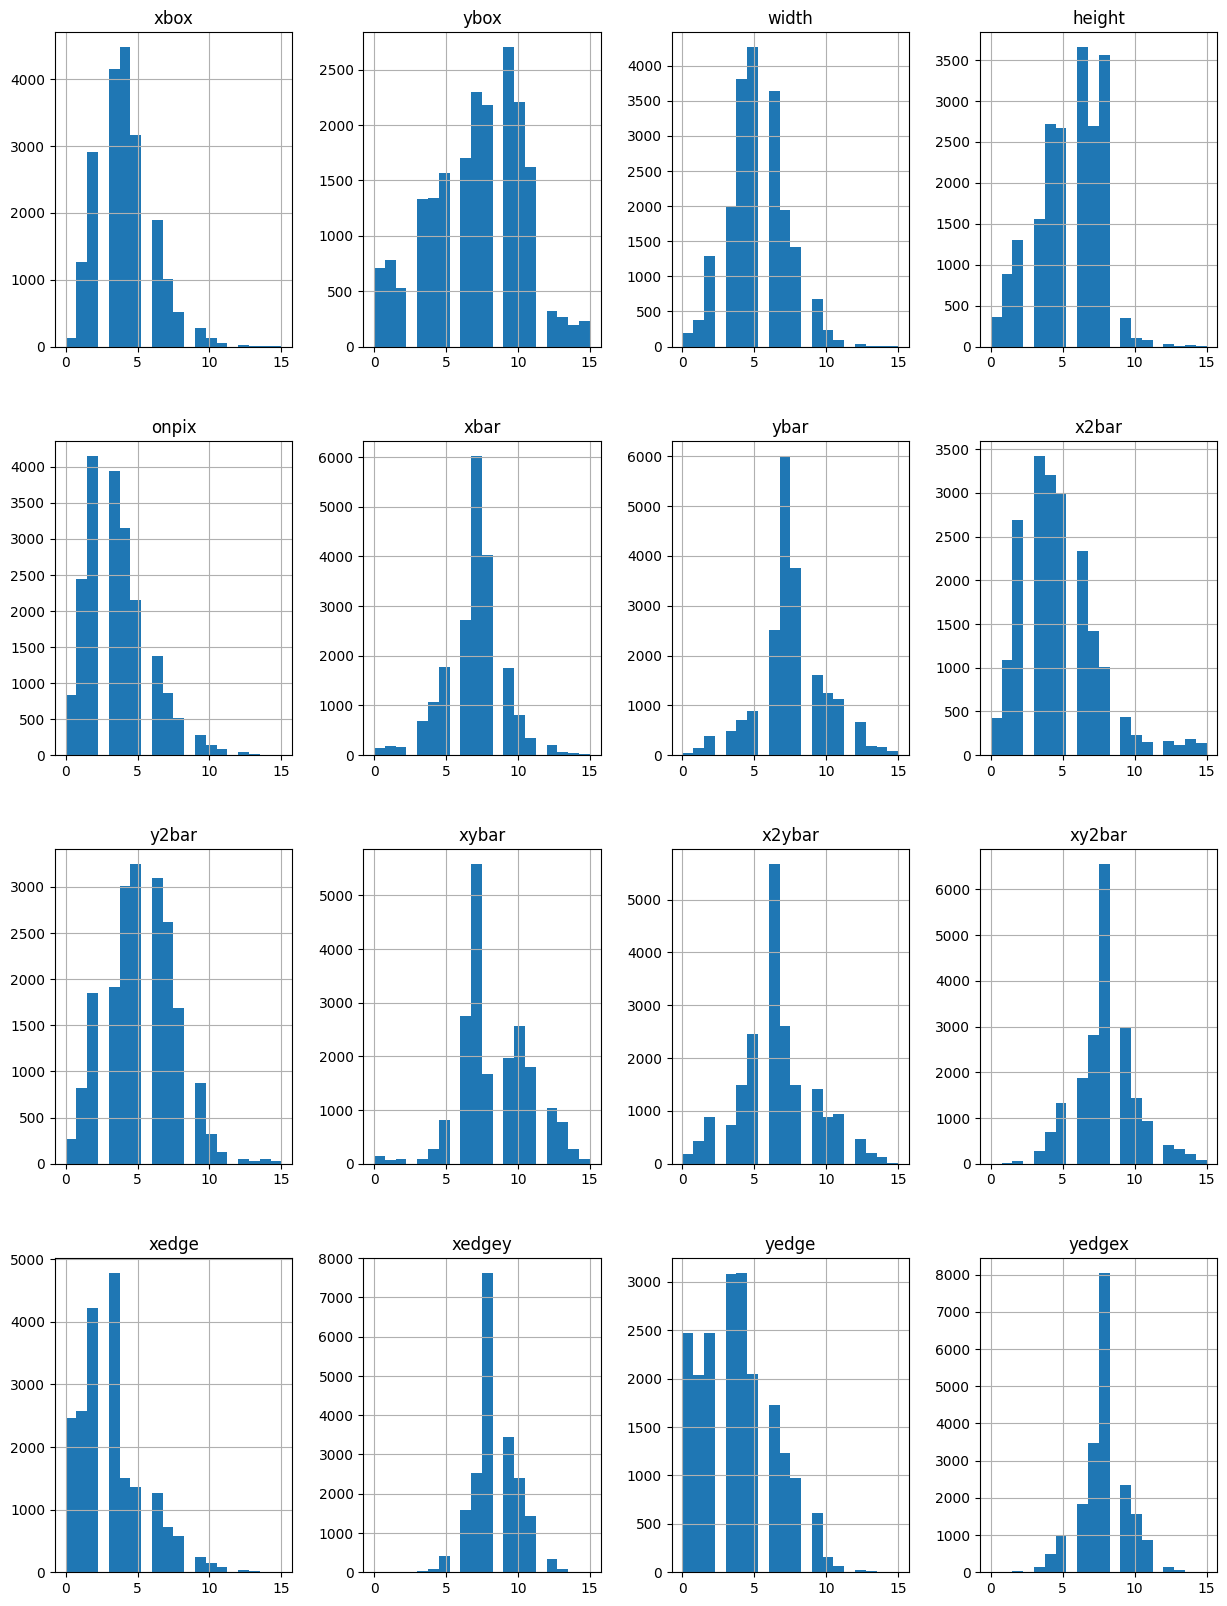

In [5]:
data.hist(bins=20,figsize=(15,20))

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler

In [7]:
le=LabelEncoder()

In [8]:
data['letter']=le.fit_transform(data['letter'])

In [9]:
x=data.drop('letter',axis=1)
y=data['letter']

In [10]:
se=StandardScaler()

In [11]:
se.fit_transform(x)

array([[-1.0576983 ,  0.29187713, -1.05327668, ..., -0.21908163,
        -1.4381527 ,  0.12291107],
       [ 0.51038497,  1.5023577 , -1.05327668, ..., -0.21908163,
         0.12008142,  1.35944092],
       [-0.01230945,  1.19973756,  0.43590966, ..., -0.8656262 ,
        -0.26947711,  0.74117599],
       ...,
       [ 1.03307939,  0.59449727,  0.43590966, ...,  2.36709667,
        -0.65903564, -2.35014863],
       [-1.0576983 , -1.22122359, -0.55688123, ...,  0.42746295,
         0.50963994,  0.12291107],
       [-0.01230945,  0.59449727,  0.43590966, ..., -0.8656262 ,
        -0.65903564,  0.12291107]])

In [12]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

ANN MODEL

In [13]:
from keras.layers import Dense
from keras.models import Sequential

In [14]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(x_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1,activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [16]:
model.fit(x_train,y_train,validation_split=0.33,epochs=20,batch_size=20)


Epoch 1/20
536/536 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.0421 - loss: -50556.0742 - val_accuracy: 0.0356 - val_loss: -872456.8125
Epoch 2/20
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.0386 - loss: -1879044.5000 - val_accuracy: 0.0356 - val_loss: -6792726.0000
Epoch 3/20
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.0397 - loss: -9744007.0000 - val_accuracy: 0.0356 - val_loss: -21172030.0000
Epoch 4/20
536/536 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.0401 - loss: -26409130.0000 - val_accuracy: 0.0356 - val_loss: -46067524.0000
Epoch 5/20
536/536 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.0412 - loss: -54058864.0000 - val_accuracy: 0.0356 - val_loss: -82659624.0000
Epoch 6/20
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.0382 - loss: -94088768.0000 - val_accuracy: 0.0356 - val_loss: -131850352.0000
Epoch 7/20
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.0389 - loss: -145983184.0000 - val_accuracy: 0.0356 - val_loss: -194444912.00

In [17]:
score=model.evaluate(x_train,y_train)

500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0419 - loss: -2567987712.0000


In [18]:
score

[-2559879680.0, 0.03837500140070915]

In [19]:
!pip install tensorflow keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.2 MB/s eta 0:00:00


In [20]:
import tensorflow as tf
from kerastuner import RandomSearch

def build_model(hp):
    model = Sequential()
    model.add(Dense(units=hp.Int('units1', min_value=32, max_value=128, step=16), activation='relu', input_shape=(x_train.shape[1],)))
    model.add(Dense(units=hp.Int('units2', min_value=16, max_value=64, step=16), activation='relu'))
    model.add(Dense(1,activation='sigmoid'))

    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
                  loss='categorical_crossentropy', metrics=['accuracy'])
    return model

<ipython-input-20-060f18344133>:2: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner import RandomSearch


In [21]:
tuner = RandomSearch(build_model, objective='val_accuracy', max_trials=5, executions_per_trial=3, directory='my_dir', project_name='alphabet_tuning')

tuner.search(x_train, y_train, epochs=50, validation_split=0.2)

Trial 5 Complete [00h 05m 19s]
val_accuracy: 0.03531249985098839

Best val_accuracy So Far: 0.03531249985098839
Total elapsed time: 00h 25m 53s


In [22]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"Best units1: {best_hps.get('units1')}, Best units2: {best_hps.get('units2')}, Best learning_rate: {best_hps.get('learning_rate')}")

Best units1: 96, Best units2: 16, Best learning_rate: 0.01


In [23]:
best_model = tuner.hypermodel.build(best_hps)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
best_model.fit(x_train, y_train, epochs=50, validation_split=0.2, batch_size=32)

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/losses/losses.py:33: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(32, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)


395/400 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0381 - loss: 0.0000e+00

/usr/local/lib/python3.11/dist-packages/keras/src/losses/losses.py:33: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(32, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)


400/400 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.0381 - loss: 0.0000e+00 - val_accuracy: 0.0353 - val_loss: 0.0000e+00
Epoch 2/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.0370 - loss: 0.0000e+00 - val_accuracy: 0.0353 - val_loss: 0.0000e+00
Epoch 3/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.0397 - loss: 0.0000e+00 - val_accuracy: 0.0353 - val_loss: 0.0000e+00
Epoch 4/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.0401 - loss: 0.0000e+00 - val_accuracy: 0.0353 - val_loss: 0.0000e+00
Epoch 5/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.0405 - loss: 0.0000e+00 - val_accuracy: 0.0353 - val_loss: 0.0000e+00
Epoch 6/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.0405 - loss: 0.0000e+00 - val_accuracy: 0.0353 - val_loss: 0.0000e+00
Epoch 7/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.0371 - loss: 0.0000e+00 - val_accuracy: 0.0353 - val_loss: 0.0000e+00
Epoch 8/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accur

Evaluation

In [25]:
test_loss, test_accuracy = best_model.evaluate(x_test, y_test)
print(f'Test Accuracy: {test_accuracy}')

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0341 - loss: 0.0000e+00
Test Accuracy: 0.03799999877810478
